In [1]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy
import math
from numba import jit

import mountain_car
import elitism
import time

# 粒子群算法
from sko.PSO import PSO
from sko.tools import set_run_mode
import matplotlib.pyplot as plt

# PSO Algorithm constants:
pop = 4800
max_iter = 100
w = 0.95
c1 = 0.5
c2 = 0.5

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the Zoo test class:
car = mountain_car.MountainCar(RANDOM_SEED)

def result2op(x):
    op = []
    for i in x:
        if i<0.5:
            op.append(0)
        elif i<1.5:
            op.append(1)
        else:
            op.append(2)
        
    return op
# fitness calculation
# @jit
def getCarScore(individual):
    individuals = result2op(individual)
    q_loss = 0
    # for i in range(len(individual)):
    #     q_loss+=math.pow(individual[i]-individuals[i],2)

    return car.getScore(individuals)+q_loss/200,  # return a tuple


/home/lizhiyuan/anaconda3/envs/ci/lib/python3.10/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


In [2]:
# 多线程优化
mode = 'multiprocessing'
set_run_mode(getCarScore, mode)
pso = PSO(func=getCarScore, n_dim=200, pop=pop, max_iter=max_iter, lb=0, ub=2.49, w=w, c1=c1, c2=c2)

tt = time.time()
pso.run()
tt2 = time.time()



In [3]:
pso.gbest_x

array([0.        , 2.49      , 2.49      , 2.49      , 2.49      ,
       2.49      , 0.        , 2.49      , 2.49      , 0.57758325,
       0.        , 2.49      , 2.49      , 2.48759371, 2.49      ,
       2.49      , 2.49      , 2.49      , 2.49      , 2.49      ,
       2.49      , 2.48432692, 2.49      , 0.        , 0.        ,
       0.        , 0.2284871 , 0.        , 2.49      , 2.49      ,
       0.2869405 , 0.        , 2.49      , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       2.49      , 0.07087701, 2.49      , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.12871512,
       2.49      , 0.        , 0.        , 0.63350653, 0.        ,
       0.        , 0.        , 0.00912999, 0.        , 0.        ,
       0.64689787, 2.49      , 0.        , 2.49      , 2.49      ,
       0.        , 1.87084215, 0.00783155, 2.49      , 2.49      ,
       2.49      , 2.49      , 2.49      , 2.49      , 2.49   

In [4]:
# print best solution:
best =result2op(pso.gbest_x)
print()
print("Best Solution = ", best)
print("Best Fitness = ", pso.gbest_y)
print('Time used: {} sec'.format(tt2-tt))



Best Solution =  [0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2]
Best Fitness =  [-0.095]
Time used: 118.35960793495178 sec


In [5]:
# save best solution for a replay:
car.saveActions(best)
car.replay(best)

1 : --------------------------
action =  0
observation =  [-0.44679132 -0.00158252]
distance from flag =  0.9467913210391998

2 : --------------------------
action =  2
observation =  [-0.4479448  -0.00115349]
distance from flag =  0.9479447901248932

3 : --------------------------
action =  2
observation =  [-0.44866085 -0.00071604]
distance from flag =  0.9486608505249023

4 : --------------------------
action =  2
observation =  [-4.489342e-01 -2.733507e-04]
distance from flag =  0.9489341974258423

5 : --------------------------
action =  2
observation =  [-4.4876286e-01  1.7133588e-04]
distance from flag =  0.9487628638744354

6 : --------------------------
action =  2
observation =  [-0.4481481   0.00061477]
distance from flag =  0.948148101568222

7 : --------------------------
action =  0
observation =  [-0.44909438 -0.00094629]
distance from flag =  0.9490943849086761

8 : --------------------------
action =  2
observation =  [-0.44959483 -0.00050043]
distance from flag =  0.9

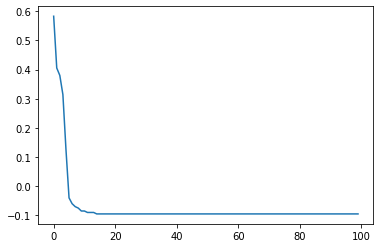

In [6]:
plt.plot(pso.gbest_y_hist)
plt.show()